# Library

In [ ]:
from library import *
from slack_library import *


2023-10-20 14:20:05.085569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 14:20:05.192239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-20 14:20:05.192271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-20 14:20:05.213736: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 14:20:06.255496: W tensorflow/stream_executor/platform/de

# Data importation

In [ ]:
data = pd.read_csv("Datasets/data.csv", sep=";")
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant
0,2,6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
1,6,5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
2,6,3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
3,7,6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
4,3,5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,8,3,2,1,21,170,0,d617476c80b6823ed202f5b86916156d
4478,2,5,11,14,3,5,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d
4479,1,6,1,11,4,2,1,5,1,21,170,0,d617476c80b6823ed202f5b86916156d
4480,4,1,11,1,5,7,7,8,1,21,170,0,d617476c80b6823ed202f5b86916156d


In [ ]:
#regroupe les scénarios en 3 catégories if i < 9 else 4 
data["scenario"] = [1 if (i > 0 and i < 4) else 2 if (i > 3 and i < 7) else 3 for i in data["scenario"]]
#data[data.scenario < 4]
data["strength_diff"]=data.strength_left - data.strength_right
for char in ["left","right"]:
    data["age_" + char]=[0 if i == 1 else 3 if i == 6 else 10 if i == 7 else 1 for i in data[char+"_char"]]
data["age_diff"]=data.age_left - data.age_right
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,strength_diff,age_left,age_right,age_diff
0,2,6,7,3,8,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,4,1,3,-2
1,6,5,3,6,1,1,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,-3,3,1,2
2,6,3,3,8,1,1,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,-5,3,1,2
3,7,6,10,3,0,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,7,10,3,7
4,3,5,8,6,5,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,3,3,2,1,21,170,0,d617476c80b6823ed202f5b86916156d,-10,0,3,-3
4478,2,5,11,14,3,2,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d,-3,1,1,0
4479,1,6,1,11,4,1,1,5,1,21,170,0,d617476c80b6823ed202f5b86916156d,-10,0,3,-3
4480,4,1,11,1,5,3,7,8,1,21,170,0,d617476c80b6823ed202f5b86916156d,10,1,0,1


# Set train and test dataset

In [ ]:
#set feature_names
#
feature_names = ["right_char","left_char","strength_diff","age_diff","scenario","age","sex","height","have_child"]
feature_names

[]

In [ ]:
#get X and Y
X = data[feature_names]
Y = data.value_left

In [ ]:
#split in train & test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


# XGBoost

## Model train

In [ ]:
#we get the best parameters for the RFC
XGBmodel = XGBClassifier(max_depth = 95, use_label_encoder=False, eval_metric='mlogloss')

#Number of trees in random forest
n_estimators = [(i + 1) * 10 for i in range(10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]
max_depth.append(None)

#We add the other parameters for Random Forest
params = {
    'max_leaves': [(i + 1) * 20 for i in range(5)],
    "n_estimators": [(i + 1) * 10 for i in range(10)],
    "max_depth": max_depth
}

grid_search_cv = GridSearchCV(XGBmodel, params, verbose=1, cv=5, scoring='accuracy', return_train_score=True)
grid_search_cv


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [ ]:
#model fitting
grid_search_cv.fit(X_train, Y_train)
best_XGB = grid_search_cv.best_estimator_
print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))

#post_message_to_slack("GRID SEARCH XGBoost \n")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [ ]:
#saving the model
filename = 'Model/XGB.pkl'
print("Sauvegarde du modèle dans ", filename)
f = open(filename, "wb")
pickle.dump(best_XGB, f)
f.close()

Sauvegarde du modèle dans  Model/XGB.pkl


In [ ]:
# loading the model
XGB = pickle.load(open(filename, "rb"))
print(XGB)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=35,
              max_leaves=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)


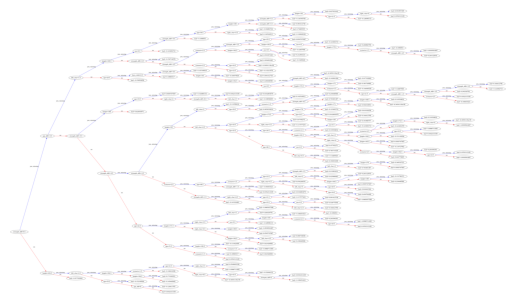

In [ ]:
plot_tree(XGB, num_trees=4, rankdir='LR')
plt.savefig("Model representation/XGB.pdf",dpi=600)


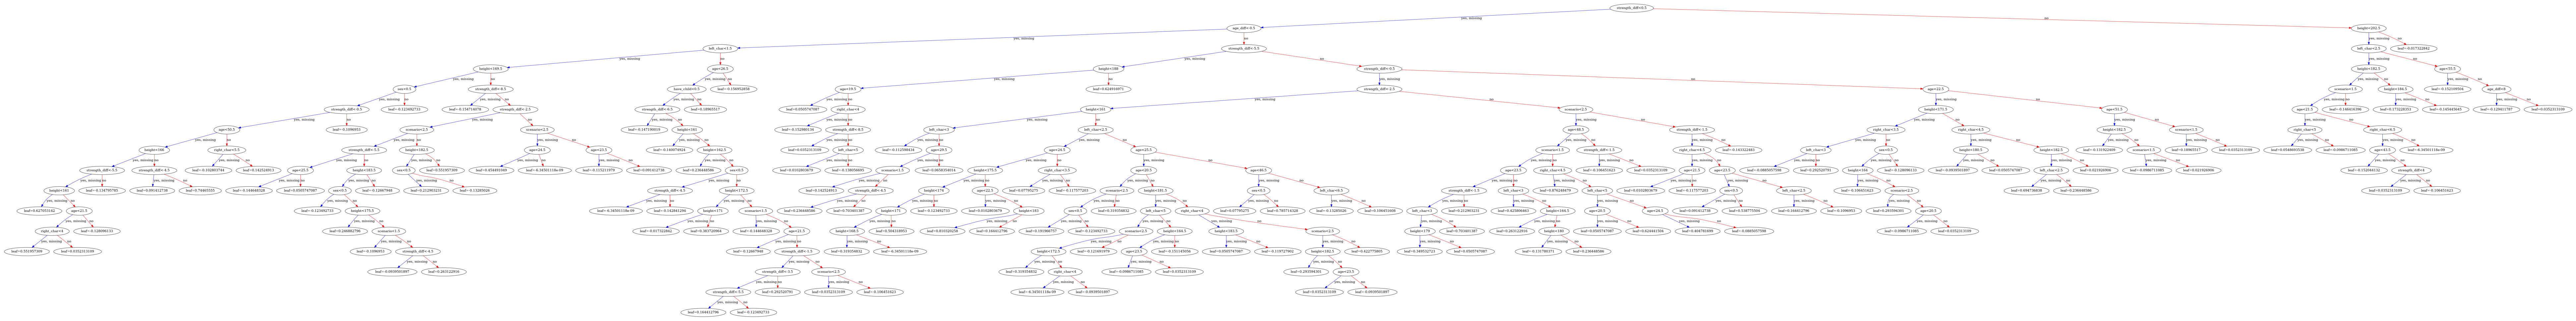

In [ ]:
    
    fig, ax = plt.subplots(figsize=(100, 100))
    plot_tree(XGB, num_trees=4, ax=ax)
    plt.show()

## Model test

In [ ]:
#Test on the test set
Y_test_predict_proba = XGB.predict_proba(X_test)
Y_test_predict = XGB.predict(X_test)

In [ ]:
#confusion matrix & report classification
print("Confusion matrix\n",multilabel_confusion_matrix(Y_test, Y_test_predict)[0])
print( classification_report(Y_test, Y_test_predict, output_dict=False, target_names=[str(i) for i in range(11)]))

Confusion matrix
 [[800  20]
 [ 10  67]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.49      0.56      0.52        32
           2       0.62      0.56      0.59        71
           3       0.49      0.57      0.53        77
           4       0.62      0.65      0.64        84
           5       0.82      0.81      0.82       219
           6       0.61      0.49      0.54        74
           7       0.62      0.62      0.62        77
           8       0.61      0.58      0.59        66
           9       0.60      0.44      0.51        48
          10       0.79      0.88      0.83        72

    accuracy                           0.68       897
   macro avg       0.64      0.64      0.64       897
weighted avg       0.68      0.68      0.68       897



In [ ]:
#confusion matrix of prediction to within 1 class
Y_test = pd.concat([Y_test], ignore_index=True)
classification_report_opti(Y_test, Y_test_predict)

0 :  {'TN': 769, 'FN': 4, 'FP': 51, 'TP': 73}
1 :  {'TN': 704, 'FN': 4, 'FP': 161, 'TP': 28}
2 :  {'TN': 698, 'FN': 8, 'FP': 128, 'TP': 63}
3 :  {'TN': 645, 'FN': 10, 'FP': 175, 'TP': 67}
4 :  {'TN': 494, 'FN': 9, 'FP': 319, 'TP': 75}
5 :  {'TN': 503, 'FN': 30, 'FP': 175, 'TP': 189}
6 :  {'TN': 528, 'FN': 15, 'FP': 295, 'TP': 59}
7 :  {'TN': 688, 'FN': 10, 'FP': 132, 'TP': 67}
8 :  {'TN': 714, 'FN': 8, 'FP': 117, 'TP': 58}
9 :  {'TN': 716, 'FN': 4, 'FP': 133, 'TP': 44}
10 :  {'TN': 778, 'FN': 4, 'FP': 47, 'TP': 68}
class | precision | recall | f1-score | accuracy
0     |  0.589     |  0.948  |  0.727    |  0.939
1     |  0.148     |  0.875  |  0.253    |  0.816
2     |  0.33     |  0.887  |  0.481    |  0.848
3     |  0.277     |  0.87  |  0.42    |  0.794
4     |  0.19     |  0.893  |  0.313    |  0.634
5     |  0.519     |  0.863  |  0.648    |  0.771
6     |  0.167     |  0.797  |  0.276    |  0.654
7     |  0.337     |  0.87  |  0.486    |  0.842
8     |  0.331     |  0.879  |  0.4

[0.939,
 0.816,
 0.848,
 0.794,
 0.634,
 0.771,
 0.654,
 0.842,
 0.861,
 0.847,
 0.943,
 0.882]

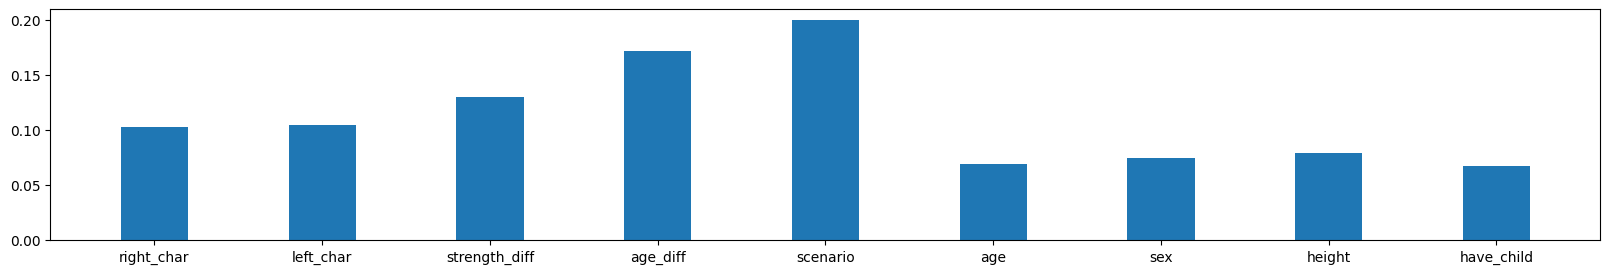

In [ ]:
#features importances
plt.rcParams["figure.figsize"] = (20, 3)

plt.bar(feature_names, XGB.feature_importances_, width=0.4)
plt.show()

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values[:, :],
                           feature_names=feature_names,
                           discretize_continuous=True,
                           class_names=range(11))

exp.explain_instance(X_test.iloc[0, :],
                     XGB.predict_proba,
                     top_labels=1, num_features=11, num_samples=random.randint(0,len(X))).show_in_notebook()

In [ ]:
from eli5 import show_weights,show_prediction
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
#https://eli5.readthedocs.io/en/latest/tutorials/xgboost-titanic.html#explaining-weights
show_prediction(XGB, X_test.iloc[0, :], show_feature_values=True)

In [ ]:
show_weights(XGB)

Weight,Feature
0.1999,scenario
0.1719,age_diff
0.1305,strength_diff
0.1047,left_char
0.1024,right_char
0.0791,height
0.0749,sex
0.0689,age
0.0677,have_child


# Average accuracy on 10 train/test dataset different

In [ ]:

margin_accuracy = pd.DataFrame(columns=range(12))
basic_accuracy = pd.DataFrame(columns=range(12))
# display(XGB.get_xgb_params())
for i in tqdm(range(10)):
    print(" Modèle n°" + str(i + 1) + " : STARTED \n")

    rand_int = random.randint(2, 1000)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.20, random_state=rand_int
    )

    # model train
    XGB_test = XGBClassifier(XGB.get_xgb_params())
    XGB_test.fit(X_train, Y_train)

    # model test
    Y_test_predict_proba = XGB_test.predict_proba(X_test)
    Y_test_predict = XGB_test.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_predict)
    print("Accuracy on test set: ", accuracy)

    # classification
    acc_0, prec_0 = accuracy_inclasses(Y_test, Y_test_predict)
    print(
        classification_report(
            Y_test,
            Y_test_predict,
            output_dict=False,
            target_names=[str(i) for i in range(11)],
        )
    )
    Y_test = pd.concat([Y_test], ignore_index=True)
    acc_1 = classification_report_opti(Y_test, Y_test_predict)

    for j in range(11):
        basic_accuracy.at[i, j] = round(acc_0[j]*100, 1)
        margin_accuracy.at[i, j] = round(acc_1[j]*100, 1)
    basic_accuracy.at[i, 11] = round(accuracy*100, 1)
    margin_accuracy.at[i, 11] = round(acc_1[11]*100, 1)

    print("\n")
    print(" Modèle n°" + str(i + 1) + " : FINISHED \n")
    post_message_to_slack("FIT " + str(i + 1) + " XGBoost \n")


  0%|          | 0/10 [00:00<?, ?it/s]/root/venv/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning
 Modèle n°1 : STARTED 

Accuracy on test set:  0.6845039018952063
class 0 :  [[790  19]
 [ 14  74]]
TP :  74 TN :  790
class 1 :  [[839  18]
 [ 21  19]]
TP :  19 TN :  839
class 2 :  [[784  33]
 [ 41  39]]
TP :  39 TN :  784
class 3 :  [[779  35]
 [ 32  51]]
TP :  51 TN :  779
class 4 :  [[777  25]
 [ 40  55]]
TP :  55 TN :  777
class 5 :  [[638  51]
 [ 30 178]]
TP :  178 TN :  638
class 6 :  [[812  29]
 [ 29  27]]
TP :  27 TN :  812
class 7 :  [[816  25]
 [ 21  35]]
TP :  35 TN :  816
class 8 :  [[826  18]
 [ 25  28]]
TP :  28 TN :  826
class 9 :  [[834  14]
 [ 13  36]]
TP :  36 TN :  834
class 10 :  [[792  16]
 [ 17  72]]
TP :  72 TN :  792
 AVG accuracy : 0.6845039018952063
              precision    recall  

In [ ]:
basic_accuracy['type']= 'basic'
margin_accuracy['type']= 'margin'
basic_accuracy['avg']=basic_accuracy[range(11)].mean()
margin_accuracy['avg']=margin_accuracy[range(11)].mean()
acc=pd.concat([basic_accuracy[['type','avg']],margin_accuracy[['type','avg']]],axis=0)


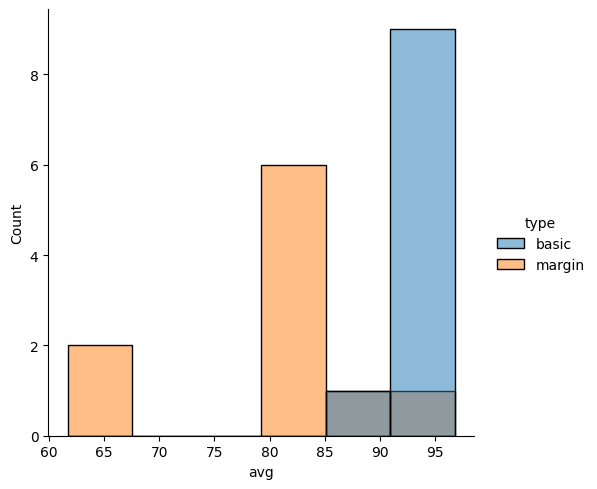

In [ ]:
sns.displot(acc,x=acc.avg,hue=acc.type)

In [ ]:
display(basic_accuracy[11].mean(),margin_accuracy[11].mean())

66.16

85.58

In [ ]:
margin_accuracy[11]

0    86.5
1    84.7
2    85.7
3    86.4
4    84.2
5    84.1
6    86.1
7    86.2
8    85.6
9    86.3
Name: 11, dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df420847-9b7d-4085-bb2b-2d13083511fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>